## HW Assignment 1

In this assignment, we will learn how to use Apache Spark RDDs and explore MapReduce and distributed processing. For each question, add your code below the question and run the code. 

Note: Your code can be in more than one cell if you choose.

Let's start by running the code below to start up a local Spark instance.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-eu.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [61]:
!pip install -q findspark
!pip install pyspark

In [62]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from pyspark import SparkContext

In [ ]:
sc = SparkContext()

In [68]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

## Assignment work starts from here

In [1]:
# Setup for local running of pyspark
import os
import sys

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [2]:
# Testing run of pyspark
import pyspark
from pyspark import SparkContext
sc = SparkContext()
n = sc.parallelize([4,10,9,7])
n.take(1)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/01/11 18:35:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


[4]

In [3]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

1. Load the Alice in Wonderland text file into an RDD

In [4]:
# Read in Alice.txt as a RDD
alice_rdd = sc.textFile("Alice.txt")

In [11]:
# print("This RDD has", alice_rdd.count(), "rows")
# alice_rdd.take(3)
# alice_rdd.first()

'The Project Gutenberg EBook of Alice’s Adventures in Wonderland, by Lewis Carroll'

2. Transform all characters lowercase and remove all non-character symbols using the map function and store this in a new RDD.

In [22]:
# Use map function to return a new lowercased, only alpha charactered RDD
import re
alice_rdd_clean = alice_rdd.map(lambda x: x.lower()).map(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [23]:
# Sanity check
alice_rdd_clean.first()

'the project gutenberg ebook of alice s adventures in wonderland  by lewis carroll'

3. Write code to calculate the distribution of word length for the book Alice in Wonderland. Print the distribution in this notebook.

In [41]:
# restructure the alice_rdd_clean to have each word as an element instead of row of words
lst_of_rows = alice_rdd_clean.map(lambda row: row).collect()
for row in lst_of_rows:
    print(row, "\n")
one_str = " ".join(lst_of_rows)
word_lst = [x.strip() for x in one_str.split()]
word_rdd = sc.parallelize(word_lst)
print("-"*20)
word_rdd.take(10)

the project gutenberg ebook of alice s adventures in wonderland  by lewis carroll 

 

this ebook is for the use of anyone anywhere at no cost and with 

almost no restrictions whatsoever   you may copy it  give it away or 

re use it under the terms of the project gutenberg license included 

with this ebook or online at www gutenberg org 

 

 

title  alice s adventures in wonderland 

 

author  lewis carroll 

 

release date  june           ebook      

last updated  february          

 

language  english 

 

character set encoding  utf   

 

    start of this project gutenberg ebook alice s adventures in wonderland     

 

 

 

produced by arthur dibianca and david widger 

 

 illustration  

 

 

 

 

alice s adventures in wonderland 

 

by lewis carroll 

 

the millennium fulcrum edition     

 

contents 

 

 chapter i      down the rabbit hole 

 chapter ii     the pool of tears 

 chapter iii    a caucus race and a long tale 

 chapter iv     the rabbit sends in

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'alice',
 's',
 'adventures',
 'in',
 'wonderland']

In [42]:
# Use map function and reduce function to count the appearance of different word length
from operator import add
length_rdd = word_rdd.map(lambda x: len(x))
# length_rdd.take(10)
length_rdd_count = length_rdd.map(lambda x: (x, 1))
word_length_count_lst = sorted(length_rdd_count.reduceByKey(add).collect(),key=lambda x: x[1],reverse=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better su

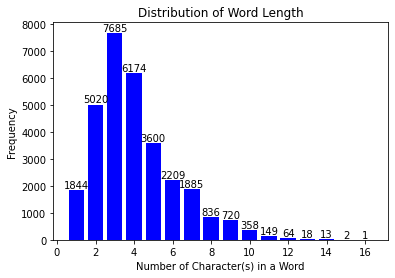

In [47]:
# Visualize the distribution of word length
import matplotlib.pyplot as plt
tmp_lst = list(zip(*word_length_count_lst))
plt.bar(tmp_lst[0], tmp_lst[1], color='b')
plt.xlabel("Number of Character(s) in a Word")
plt.ylabel("Frequency")
plt.title("Distribution of Word Length")
for i in range(len(tmp_lst[0])):
    plt.annotate(tmp_lst[1][i],xy=(tmp_lst[0][i], tmp_lst[1][i]),ha='center',va='bottom')
plt.show()

4. N-grams are contiguous sequences of n words. Write a function to take a string containing multiple words and n as input and return a list of n-grams (the length of the n-grams is a parameter inputted into the function). 


Note: it's fine to only create ngrams out of each row of the text. For the purpose of this exercise, there is no need to combine rows of text.

In [56]:
def n_gram(n, txt):
    words = [word.strip() for word in txt.split()]
    tmp = zip(*[words[i:] for i in range(0,n)])
    result = [" ".join(ngram) for ngram in tmp]
    return result

In [58]:
# Sanity check
testing = "Note: it's fine to only create ngrams out of each row of the text. For the purpose of this exercise, there is no need to combine rows of text."
ngram = n_gram(2, testing)
ngram

["Note: it's",
 "it's fine",
 'fine to',
 'to only',
 'only create',
 'create ngrams',
 'ngrams out',
 'out of',
 'of each',
 'each row',
 'row of',
 'of the',
 'the text.',
 'text. For',
 'For the',
 'the purpose',
 'purpose of',
 'of this',
 'this exercise,',
 'exercise, there',
 'there is',
 'is no',
 'no need',
 'need to',
 'to combine',
 'combine rows',
 'rows of',
 'of text.']

5. Transform the RDD containing the book Alice in Wonderland to an RDD containing all 2-grams from each row in the book.

In [62]:
alice_rdd_2_gram = alice_rdd_clean.map(lambda x: n_gram(2, x))
alice_rdd_2_gram.take(5)

[['the project',
  'project gutenberg',
  'gutenberg ebook',
  'ebook of',
  'of alice',
  'alice s',
  's adventures',
  'adventures in',
  'in wonderland',
  'wonderland by',
  'by lewis',
  'lewis carroll'],
 [],
 ['this ebook',
  'ebook is',
  'is for',
  'for the',
  'the use',
  'use of',
  'of anyone',
  'anyone anywhere',
  'anywhere at',
  'at no',
  'no cost',
  'cost and',
  'and with'],
 ['almost no',
  'no restrictions',
  'restrictions whatsoever',
  'whatsoever you',
  'you may',
  'may copy',
  'copy it',
  'it give',
  'give it',
  'it away',
  'away or'],
 ['re use',
  'use it',
  'it under',
  'under the',
  'the terms',
  'terms of',
  'of the',
  'the project',
  'project gutenberg',
  'gutenberg license',
  'license included']]

6. Write code to find the distribution of all 2-grams in the book and print it below.

In [66]:
lst_of_lst = alice_rdd_2_gram.map(lambda row: row).collect()
temp = []
lst_of_two_gram = [ngram for lst in lst_of_lst if lst for ngram in lst]
two_gram_rdd = sc.parallelize(lst_of_two_gram)
two_gram_rdd.take(10)

alice_rdd_2_gram_count = two_gram_rdd.map(lambda x: (x, 1))
two_gram_count_lst = sorted(alice_rdd_2_gram_count.reduceByKey(add).collect(),key=lambda x: x[1],reverse=True)
two_gram_count_lst

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better su

[('said the', 206),
 ('of the', 157),
 ('said alice', 112),
 ('in a', 101),
 ('in the', 91),
 ('to the', 84),
 ('and the', 79),
 ('project gutenberg', 73),
 ('it was', 73),
 ('the queen', 68),
 ('don t', 61),
 ('the king', 60),
 ('as she', 59),
 ('i m', 59),
 ('at the', 58),
 ('it s', 57),
 ('gutenberg tm', 57),
 ('a little', 57),
 ('she had', 55),
 ('the mock', 54),
 ('to be', 53),
 ('and she', 53),
 ('she was', 53),
 ('with the', 52),
 ('mock turtle', 52),
 ('the hatter', 51),
 ('the gryphon', 49),
 ('went on', 48),
 ('you know', 40),
 ('if you', 39),
 ('out of', 39),
 ('the duchess', 38),
 ('said to', 38),
 ('to herself', 38),
 ('on the', 37),
 ('that s', 35),
 ('the dormouse', 35),
 ('that she', 34),
 ('i ve', 34),
 ('there was', 33),
 ('she said', 32),
 ('i ll', 31),
 ('march hare', 31),
 ('was a', 31),
 ('of this', 30),
 ('i don', 30),
 ('by the', 30),
 ('and then', 30),
 ('the march', 29),
 ('the project', 29),
 ('all the', 28),
 ('so she', 28),
 ('she could', 28),
 ('the other'

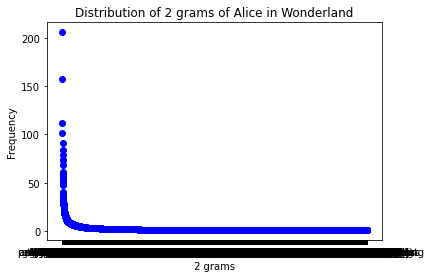

In [68]:
# temp_lst = list(zip(*two_gram_count_lst))
# plt.scatter(temp_lst[0], temp_lst[1], color='b')
# plt.xlabel("2 grams")
# plt.ylabel("Frequency")
# plt.title("Distribution of 2 grams of Alice in Wonderland")
# # for i in range(len(temp_lst[0])):
# #     plt.annotate(temp_lst[1][i],xy=(temp_lst[0][i], temp_lst[1][i]),ha='center',va='bottom')
# plt.show()